In [ ]:
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('all')

In [86]:
df = pd.read_csv('./sample_data/Twitter_Data.csv')
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [88]:
df = df.head(500)

In [89]:
def preprocess_text(text):
    if not isinstance(text, str):
      return ""

    tokens = word_tokenize(text.lower())
    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

df['cleanedText'] = df['clean_text'].apply(preprocess_text)
df.head()

,clean_text,category,cleanedText
0,when modi promised “minimum government maximum...,-1.0,modi promised “ minimum government maximum gov...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...
3,asking his supporters prefix chowkidar their n...,1.0,asking supporter prefix chowkidar name modi gr...
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...


In [90]:
!pip install vaderSentiment

In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    if not isinstance(text, str) or not text.strip():
        return 0

    scores = analyzer.polarity_scores(text)

    if scores['compound'] >= 0.05:
        return 1
    elif scores['compound'] <= -0.05:
        return -1
    else:
        return 0

df['sentiment'] = df['cleanedText'].apply(get_sentiment)
df

,clean_text,category,cleanedText,sentiment
0,when modi promised “minimum government maximum...,-1.0,modi promised “ minimum government maximum gov...,1
1,talk all the nonsense and continue all the dra...,0.0,talk nonsense continue drama vote modi,-1
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcome bjp told rahul main camp...,1
3,asking his supporters prefix chowkidar their n...,1.0,asking supporter prefix chowkidar name modi gr...,1
4,answer who among these the most powerful world...,1.0,answer among powerful world leader today trump...,1
...,...,...,...,...
495,subbu with you swamy right thinks has right or...,1.0,subbu swamy right think right order get work d...,1
496,some ppl gone crazy after modi came,-1.0,ppl gone crazy modi came,-1
497,why modi have not held single press conference...,-1.0,modi held single press conference ’ speak answ...,0
498,again agenda only defeat bjp could have told t...,1.0,agenda defeat bjp could told development agend...,-1


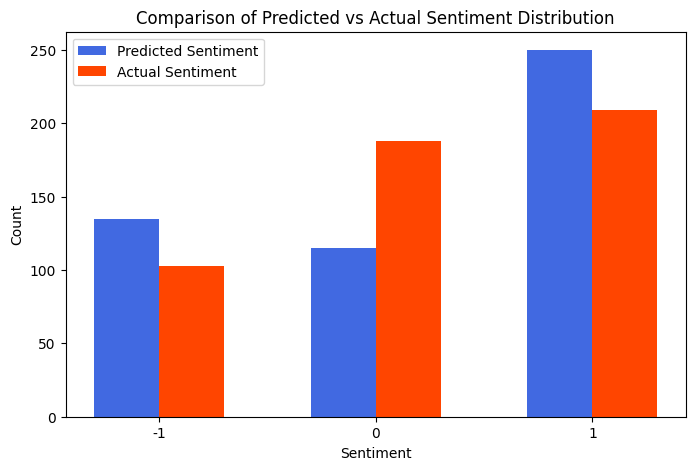

In [92]:
import numpy as np
import matplotlib.pyplot as plt

all_sentiments = sorted(set(df['sentiment'].unique()).union(set(df['category'].unique())))

sentiment_counts = df['sentiment'].value_counts().reindex(all_sentiments, fill_value=0)
real_sentiment_counts = df['category'].value_counts().reindex(all_sentiments, fill_value=0)

x = np.arange(len(all_sentiments))
width = 0.3

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, sentiment_counts.values, width=width, label="Predicted Sentiment", color='royalblue')
plt.bar(x + width/2, real_sentiment_counts.values, width=width, label="Actual Sentiment", color='orangered')

plt.xticks(x, all_sentiments)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Comparison of Predicted vs Actual Sentiment Distribution")
plt.legend()

plt.show()

In [93]:
correct_predictions = (df['sentiment'] == df['category']).sum()
total_predictions = len(df)
accuracy = (correct_predictions / total_predictions) * 100

print("Accuracy:", f"{accuracy:.2f}%")

Accuracy: 56.00%
